# Swing states

V případě amerických prezidentských voleb obecně platí, že ve většině států dlouhodobě vyhrávají kandidáti jedné strany. Například v Kalifornii vyhrává kandidát Demokratické strany or roku 1992, v Texasu kandidát Republikánské strany od roku 1980, v Kansasu do konce od roku 1968 atd. Státy, kde se vítězné strany střídají, jsou označovány jako "swing states" ("kolísavé státy"). Tvým úkolem je vybrat státy, které lze označit jako swing states.

V souboru [1976-2020-president.csv](1976-2020-president.csv) najdeš historické výsledky amerických prezidentských voleb. Každý řádek souboru obsahuje počet hlasů pro kandidáta dané strany v daném roce.

V souboru jsou důležité následující sloupce:

- `Year` - rok voleb,
- `State` - stát,
- `party_simplified` - zjednodušené označení politické strany,
- `candidatevotes` - počet hlasů pro vybraného kandidáta,
- `totalvotes` - celkový počet odevzdaných hlasů.

Proveď níže uvedené úkoly.

1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.
1. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.
1. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.
1. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.
1. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.
1. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.
1. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.
1. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.
1. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [82]:
import pandas

data = pandas.read_csv("1976-2020-president.csv")
data = data.sort_values(["year", "state", "candidatevotes"], ascending=[True, True, False])
data["rank"] = data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
data.to_csv("ukol_01_napoveda_01.csv", index=False)
data.head()

year    state state_po  state_fips  state_cen  state_ic        office   
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT  \
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein   
0            CARTER, JIMMY                    DEMOCRAT   False  \
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes party_simplified  rank  
0          659170     1182850  20210113    NaN         DEMOCRAT   1.0  
1          504070     1182850  20210113    NaN       REPUBLICAN   2.0  
2            9198     1182850  20210113    NaN            OTHER   3.0  
3            6669     1182850  20210113    NaN            OTHER   4.0  
4            1954     1182850  20210113    NaN            OTHER   5.0

In [83]:
data = data[data["rank"] == 1]
data.to_csv("ukol_01_napoveda_02.csv", index=False)
data.head()

year       state state_po  state_fips  state_cen  state_ic        office   
0   1976     ALABAMA       AL           1         63        41  US PRESIDENT  \
7   1976      ALASKA       AK           2         94        81  US PRESIDENT   
11  1976     ARIZONA       AZ           4         86        61  US PRESIDENT   
19  1976    ARKANSAS       AR           5         71        42  US PRESIDENT   
23  1976  CALIFORNIA       CA           6         93        71  US PRESIDENT   

        candidate party_detailed writein  candidatevotes  totalvotes   
0   CARTER, JIMMY       DEMOCRAT   False          659170     1182850  \
7    FORD, GERALD     REPUBLICAN   False           71555      123574   
11   FORD, GERALD     REPUBLICAN   False          418642      742719   
19  CARTER, JIMMY       DEMOCRAT   False          498604      767535   
23   FORD, GERALD     REPUBLICAN   False         3882244     7803770   

     version  notes party_simplified  rank  
0   20210113    NaN         DEMOCRAT   1.0  
7   20210113    NaN       REPUBLICAN   1.0  
11  20210113    NaN       REPUBLICAN   1.0  
19  20210113    NaN         DEMOCRAT   1.0  
23  20210113    NaN       REPUBLICAN   1.0

In [84]:
data = data.sort_values(["state", "year"])
data["previous_winner_party"] = data.groupby("state")["party_simplified"].shift(1)
data.to_csv("ukol_01_napoveda_03.csv", index=False)
data.head()

year    state state_po  state_fips  state_cen  state_ic        office   
0     1976  ALABAMA       AL           1         63        41  US PRESIDENT  \
332   1980  ALABAMA       AL           1         63        41  US PRESIDENT   
696   1984  ALABAMA       AL           1         63        41  US PRESIDENT   
1019  1988  ALABAMA       AL           1         63        41  US PRESIDENT   
1304  1992  ALABAMA       AL           1         63        41  US PRESIDENT   

              candidate party_detailed writein  candidatevotes  totalvotes   
0         CARTER, JIMMY       DEMOCRAT   False          659170     1182850  \
332      REAGAN, RONALD     REPUBLICAN   False          654192     1341929   
696      REAGAN, RONALD     REPUBLICAN   False          872849     1441713   
1019  BUSH, GEORGE H.W.     REPUBLICAN   False          815576     1378476   
1304  BUSH, GEORGE H.W.     REPUBLICAN   False          804283     1688060   

       version  notes party_simplified  rank previous_winner_party  
0     20210113    NaN         DEMOCRAT   1.0                   NaN  
332   20210113    NaN       REPUBLICAN   1.0              DEMOCRAT  
696   20210113    NaN       REPUBLICAN   1.0            REPUBLICAN  
1019  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN  
1304  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN

In [85]:
def zmena(row):
    if not pandas.isnull(row["previous_winner_party"]) and row["previous_winner_party"] != row["party_simplified"]:
        return 1
    return 0

data["change"] = data.apply(zmena, axis=1)
data.to_csv("ukol_01_napoveda_04.csv", index=False)
data[data["state"] == "OHIO"]

year state state_po  state_fips  state_cen  state_ic        office   
228   1976  OHIO       OH          39         31        24  US PRESIDENT  \
584   1980  OHIO       OH          39         31        24  US PRESIDENT   
917   1984  OHIO       OH          39         31        24  US PRESIDENT   
1215  1988  OHIO       OH          39         31        24  US PRESIDENT   
1566  1992  OHIO       OH          39         31        24  US PRESIDENT   
1930  1996  OHIO       OH          39         31        24  US PRESIDENT   
2297  2000  OHIO       OH          39         31        24  US PRESIDENT   
2635  2004  OHIO       OH          39         31        24  US PRESIDENT   
2975  2008  OHIO       OH          39         31        24  US PRESIDENT   
3302  2012  OHIO       OH          39         31        24  US PRESIDENT   
3645  2016  OHIO       OH          39         31        24  US PRESIDENT   
4148  2020  OHIO       OH          39         31        24  US PRESIDENT   

              candidate party_detailed writein  candidatevotes  totalvotes   
228       CARTER, JIMMY       DEMOCRAT   False         2009959     4110456  \
584      REAGAN, RONALD     REPUBLICAN   False         2206545     4283603   
917      REAGAN, RONALD     REPUBLICAN   False         2678559     4563235   
1215  BUSH, GEORGE H.W.     REPUBLICAN   False         2416549     4393585   
1566      CLINTON, BILL       DEMOCRAT   False         1984942     4939967   
1930      CLINTON, BILL       DEMOCRAT   False         2148222     4534434   
2297    BUSH, GEORGE W.     REPUBLICAN   False         2350363     4701998   
2635    BUSH, GEORGE W.     REPUBLICAN   False         2859764     5627903   
2975   OBAMA, BARACK H.       DEMOCRAT   False         2940044     5708350   
3302   OBAMA, BARACK H.       DEMOCRAT   False         2827621     5580822   
3645   TRUMP, DONALD J.     REPUBLICAN   False         2841005     5496487   
4148   TRUMP, DONALD J.     REPUBLICAN   False         3154834     5922202   

       version  notes party_simplified  rank previous_winner_party  change  
228   20210113    NaN         DEMOCRAT   1.0                   NaN       0  
584   20210113    NaN       REPUBLICAN   1.0              DEMOCRAT       1  
917   20210113    NaN       REPUBLICAN   1.0            REPUBLICAN       0  
1215  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN       0  
1566  20210113    NaN         DEMOCRAT   1.0            REPUBLICAN       1  
1930  20210113    NaN         DEMOCRAT   1.0              DEMOCRAT       0  
2297  20210113    NaN       REPUBLICAN   1.0              DEMOCRAT       1  
2635  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN       0  
2975  20210113    NaN         DEMOCRAT   1.0            REPUBLICAN       1  
3302  20210113    NaN         DEMOCRAT   1.0              DEMOCRAT       0  
3645  20210113    NaN       REPUBLICAN   1.0              DEMOCRAT       1  
4148  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN       0

In [86]:
data_pivot = data.groupby(["state"])["change"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("change", ascending=False)
data_pivot.to_csv("ukol_01_napoveda_05.csv")
data_pivot

change
state                       
OHIO                       5
FLORIDA                    5
GEORGIA                    4
WISCONSIN                  4
IOWA                       4
PENNSYLVANIA               4
NEVADA                     3
TENNESSEE                  3
LOUISIANA                  3
KENTUCKY                   3
NORTH CAROLINA             3
MISSOURI                   3
NEW HAMPSHIRE              3
MICHIGAN                   3
NEW MEXICO                 3
WEST VIRGINIA              3
COLORADO                   3
ARKANSAS                   3
ARIZONA                    3
MONTANA                    2
RHODE ISLAND               2
NEW YORK                   2
MASSACHUSETTS              2
MARYLAND                   2
INDIANA                    2
HAWAII                     2
DELAWARE                   2
SOUTH CAROLINA             1
VERMONT                    1
OREGON                     1
VIRGINIA                   1
WASHINGTON                 1
TEXAS                      1
ALABAMA                    1
MAINE                      1
CALIFORNIA                 1
CONNECTICUT                1
MISSISSIPPI                1
ILLINOIS                   1
NEW JERSEY                 1
UTAH                       0
DISTRICT OF COLUMBIA       0
IDAHO                      0
NORTH DAKOTA               0
KANSAS                     0
SOUTH DAKOTA               0
MINNESOTA                  0
ALASKA                     0
NEBRASKA                   0
OKLAHOMA                   0
WYOMING                    0

<Axes: xlabel='state'>

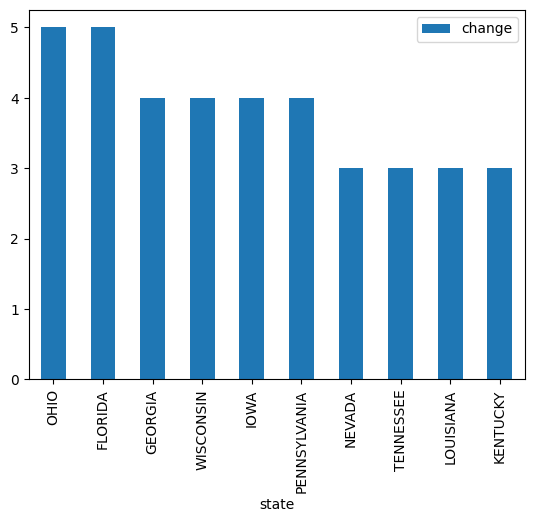

In [87]:
import matplotlib.pyplot as plt

data_pivot = data_pivot.iloc[:10]
data_pivot.plot(kind="bar")

In [88]:
def evaluate_swing(row):
    if row["party_simplified"] == row["previous_winner_party"]:
        return "no swing"
    elif row["party_simplified"] == "DEMOCRAT":
        return "to Dem."
    elif row["party_simplified"] == "REPUBLICAN":
        return "to Rep."
    else:
        return "other"

data_swing = data[data["year"] > 1976].reset_index()
data_swing["swing"] = data_swing.apply(evaluate_swing, axis=1)
data_swing.to_csv("ukol_01_napoveda_09.csv", index=False)
data_swing.head()

index  year    state state_po  state_fips  state_cen  state_ic   
0    332  1980  ALABAMA       AL           1         63        41  \
1    696  1984  ALABAMA       AL           1         63        41   
2   1019  1988  ALABAMA       AL           1         63        41   
3   1304  1992  ALABAMA       AL           1         63        41   
4   1674  1996  ALABAMA       AL           1         63        41   

         office          candidate party_detailed writein  candidatevotes   
0  US PRESIDENT     REAGAN, RONALD     REPUBLICAN   False          654192  \
1  US PRESIDENT     REAGAN, RONALD     REPUBLICAN   False          872849   
2  US PRESIDENT  BUSH, GEORGE H.W.     REPUBLICAN   False          815576   
3  US PRESIDENT  BUSH, GEORGE H.W.     REPUBLICAN   False          804283   
4  US PRESIDENT       DOLE, ROBERT     REPUBLICAN   False          769044   

   totalvotes   version  notes party_simplified  rank previous_winner_party   
0     1341929  20210113    NaN       REPUBLICAN   1.0              DEMOCRAT  \
1     1441713  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN   
2     1378476  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN   
3     1688060  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN   
4     1534349  20210113    NaN       REPUBLICAN   1.0            REPUBLICAN   

   change     swing  
0       1   to Rep.  
1       0  no swing  
2       0  no swing  
3       0  no swing  
4       0  no swing

In [89]:
data_pivot = pandas.pivot_table(data_swing, "rank", "year", "swing", len)
data_pivot.to_csv("ukol_01_napoveda_10.csv")
data_pivot

swing  no swing  to Dem.  to Rep.
year                             
1980       35.0      NaN     16.0
1984       45.0      NaN      6.0
1988       42.0      9.0      NaN
1992       29.0     22.0      NaN
1996       46.0      2.0      3.0
2000       40.0      NaN     11.0
2004       48.0      1.0      2.0
2008       42.0      9.0      NaN
2012       49.0      NaN      2.0
2016       45.0      NaN      6.0
2020       46.0      5.0      NaN

In [90]:
data = pandas.read_csv("1976-2020-president.csv")
data = data.sort_values(["year", "state", "candidatevotes"], ascending=[True, True, False])
data["rank"] = data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
data = data[data["rank"] <= 2]
data = data.reset_index()
data["second_candidate_votes"] = data.groupby(["year", "state"])["candidatevotes"].shift(-1)
data_winners = data[data["rank"] == 1]
data_winners = data_winners.reset_index()
data_winners["margin"] = data_winners["candidatevotes"] - data_winners["second_candidate_votes"]
data_winners.to_csv("ukol_01_napoveda_06.csv", index=False)
data_winners.head()

level_0  index  year       state state_po  state_fips  state_cen  state_ic   
0        0      0  1976     ALABAMA       AL           1         63        41  \
1        2      7  1976      ALASKA       AK           2         94        81   
2        4     11  1976     ARIZONA       AZ           4         86        61   
3        6     19  1976    ARKANSAS       AR           5         71        42   
4        8     23  1976  CALIFORNIA       CA           6         93        71   

         office      candidate party_detailed writein  candidatevotes   
0  US PRESIDENT  CARTER, JIMMY       DEMOCRAT   False          659170  \
1  US PRESIDENT   FORD, GERALD     REPUBLICAN   False           71555   
2  US PRESIDENT   FORD, GERALD     REPUBLICAN   False          418642   
3  US PRESIDENT  CARTER, JIMMY       DEMOCRAT   False          498604   
4  US PRESIDENT   FORD, GERALD     REPUBLICAN   False         3882244   

   totalvotes   version  notes party_simplified  rank  second_candidate_votes   
0     1182850  20210113    NaN         DEMOCRAT   1.0                504070.0  \
1      123574  20210113    NaN       REPUBLICAN   1.0                 44058.0   
2      742719  20210113    NaN       REPUBLICAN   1.0                295602.0   
3      767535  20210113    NaN         DEMOCRAT   1.0                267903.0   
4     7803770  20210113    NaN       REPUBLICAN   1.0               3742284.0   

     margin  
0  155100.0  
1   27497.0  
2  123040.0  
3  230701.0  
4  139960.0

In [91]:
data_winners["relative_margin"] = (data_winners["candidatevotes"] - data_winners["second_candidate_votes"])/data_winners["totalvotes"]
data_winners.to_csv("ukol_01_napoveda_07.csv", index=False)
data_winners.head()

level_0  index  year       state state_po  state_fips  state_cen  state_ic   
0        0      0  1976     ALABAMA       AL           1         63        41  \
1        2      7  1976      ALASKA       AK           2         94        81   
2        4     11  1976     ARIZONA       AZ           4         86        61   
3        6     19  1976    ARKANSAS       AR           5         71        42   
4        8     23  1976  CALIFORNIA       CA           6         93        71   

         office      candidate  ... writein candidatevotes  totalvotes   
0  US PRESIDENT  CARTER, JIMMY  ...   False         659170     1182850  \
1  US PRESIDENT   FORD, GERALD  ...   False          71555      123574   
2  US PRESIDENT   FORD, GERALD  ...   False         418642      742719   
3  US PRESIDENT  CARTER, JIMMY  ...   False         498604      767535   
4  US PRESIDENT   FORD, GERALD  ...   False        3882244     7803770   

    version  notes  party_simplified rank  second_candidate_votes    margin   
0  20210113    NaN          DEMOCRAT  1.0                504070.0  155100.0  \
1  20210113    NaN        REPUBLICAN  1.0                 44058.0   27497.0   
2  20210113    NaN        REPUBLICAN  1.0                295602.0  123040.0   
3  20210113    NaN          DEMOCRAT  1.0                267903.0  230701.0   
4  20210113    NaN        REPUBLICAN  1.0               3742284.0  139960.0   

   relative_margin  
0         0.131124  
1         0.222514  
2         0.165662  
3         0.300574  
4         0.017935  

[5 rows x 21 columns]

In [92]:
data_winners = data_winners.sort_values("relative_margin")
data_winners.to_csv("ukol_01_napoveda_08.csv", index=False)
data_winners.head()

level_0  index  year          state state_po  state_fips  state_cen   
315      630   2106  2000        FLORIDA       FL          12         59  \
337      674   2266  2000     NEW MEXICO       NM          35         85   
433      866   2907  2008       MISSOURI       MO          29         43   
72       144    479  1980  MASSACHUSETTS       MA          25         14   
37        74    241  1976         OREGON       OR          41         92   

     state_ic        office        candidate  ... writein candidatevotes   
315        43  US PRESIDENT  BUSH, GEORGE W.  ...   False        2912790  \
337        66  US PRESIDENT         GORE, AL  ...   False         286783   
433        34  US PRESIDENT     MCCAIN, JOHN  ...   False        1445814   
72          3  US PRESIDENT   REAGAN, RONALD  ...   False        1057631   
37         72  US PRESIDENT     FORD, GERALD  ...   False         492120   

     totalvotes   version  notes  party_simplified rank   
315     5963110  20210113    NaN        REPUBLICAN  1.0  \
337      598605  20210113    NaN          DEMOCRAT  1.0   
433     2925205  20210113    NaN        REPUBLICAN  1.0   
72      2524090  20210113    NaN        REPUBLICAN  1.0   
37      1029876  20210113    NaN        REPUBLICAN  1.0   

     second_candidate_votes  margin  relative_margin  
315               2912253.0   537.0         0.000090  
337                286417.0   366.0         0.000611  
433               1441911.0  3903.0         0.001334  
72                1053802.0  3829.0         0.001517  
37                 490407.0  1713.0         0.001663  

[5 rows x 21 columns]